In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as cl
from matplotlib.colorbar import Colorbar
import pandas as pd
import numpy as np
import glob
from sklearn.ensemble import RandomForestClassifier

In [2]:
tess_list = glob.glob('./targetdata/*_tess.csv')

tess_data = []

for filename in tess_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    tess_data.append(df)
    
tess_data = pd.concat(tess_data, axis=0, ignore_index=True)

In [3]:
kic_t = tess_data['KIC']
p_r_t = tess_data['Santos Period (d)']

ls_tess_a = tess_data['LS Period 1st peak (d)']
ls_tess_b = tess_data['LS Period 2nd peak (d)']
ls_tess_c = tess_data['LS Period 3rd peak (d)']
ls_tess_rms_a = tess_data['LS Period 1st RMS']
ls_tess_rms_b = tess_data['LS Period 2nd RMS']
ls_tess_rms_c = tess_data['LS Period 3rd RMS']
ls_tess_mad_a = tess_data['LS Period 1st MAD']
ls_tess_mad_b = tess_data['LS Period 2nd MAD']
ls_tess_mad_c = tess_data['LS Period 3rd MAD']
ls_tess2_a = tess_data['LS 2-term Period 1st peak (d)']
ls_tess2_b = tess_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c = tess_data['LS 2-term Period 3rd peak (d)']
ls_tess2_rms_a = tess_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b = tess_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c = tess_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a = tess_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b = tess_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c = tess_data['LS 2-term Period 3rd MAD']
acf_tess_a = tess_data['ACF Period 1st peak (d)']
acf_tess_b = tess_data['ACF Period 2nd peak (d)']
acf_tess_c = tess_data['ACF Period 3rd peak (d)']
acf_tess_rms_a = tess_data['ACF Period 1st RMS']
acf_tess_rms_b = tess_data['ACF Period 2nd RMS']
acf_tess_rms_c = tess_data['ACF Period 3rd RMS']
acf_tess_mad_a = tess_data['ACF Period 1st MAD']
acf_tess_mad_b = tess_data['ACF Period 2nd MAD']
acf_tess_mad_c = tess_data['ACF Period 3rd MAD']
ls_med_tess = tess_data['LS median power']
ls2_med_tess = tess_data['LS 2-term median power']
rvar_tess = tess_data['Rvar']
cdpp_tess = tess_data['CDPP']

In [4]:
ts1 = pd.read_csv('S21_train.csv')
ts2 = pd.read_csv('S21n_train.csv')
training_set = pd.concat([ts1, ts2])
kic_match = training_set['KIC']
kp_match = training_set['Kp']
teff_match = training_set['Teff']
binary_match = training_set['Flag_Binary']
koi_match = training_set['Flag_KOI']
# sph_match = training_set['Sph']

kic_t_train = kic_match[:np.where(kic_match==max(kic_t))[0][0]+1].reindex(kic_t).index.values
kp_t = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t.values]
teff_t = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t.values]
flag_binary_t = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t.values]
flag_koi_t = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [5]:
period_state = [1 if p > 0 else 0 for p in p_r_t]

<IPython.core.display.Javascript object>


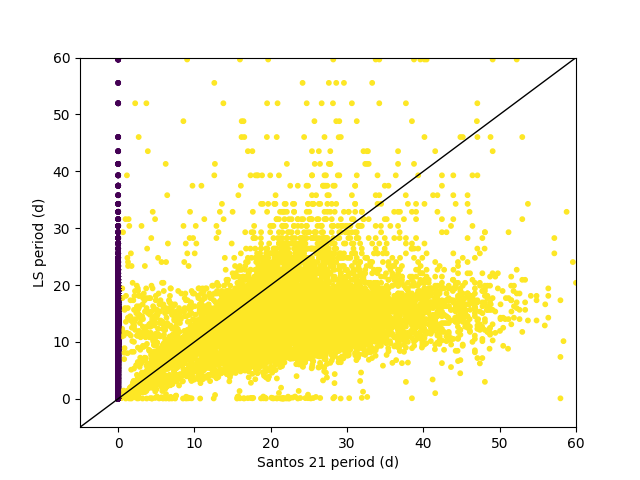

[(-5.0, 60.0),
 (-5.0, 60.0),
 Text(0.5, 0, 'Santos 21 period (d)'),
 Text(0, 0.5, 'LS period (d)')]

In [6]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.scatter(p_r_t, ls_tess_a, c=period_state, s=10)
ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
ax.set(xlim=(-5, 60), ylim=(-5,60),
       xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [110]:
features = np.array([ls_tess_a, ls_tess_b, ls_tess_c,
                    ls_tess_rms_a, ls_tess_rms_b, ls_tess_rms_c,
                    ls_tess_mad_a, ls_tess_mad_b, ls_tess_mad_c,
                    ls_tess2_a, ls_tess2_b, ls_tess2_c,
                    ls_tess2_rms_a, ls_tess2_rms_b, ls_tess2_rms_c,
                    ls_tess2_mad_a, ls_tess2_mad_b, ls_tess2_mad_c,
                    acf_tess_a, acf_tess_b, acf_tess_c,
                    acf_tess_rms_a, acf_tess_rms_b, acf_tess_rms_c,
                    acf_tess_mad_a, acf_tess_mad_b, acf_tess_mad_c,
                    ls_med_tess, ls2_med_tess, rvar_tess, cdpp_tess])#,
                    #kp_t, teff_t])#, flag_binary_t, flag_koi_t])
feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                 'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                 'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                 'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                 'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                 'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                 'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                 'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                 'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
                 'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [111]:
features[np.isnan(features)] = 0

In [112]:
forest = RandomForestClassifier(random_state=0)
forest.fit(features.T, period_state)

RandomForestClassifier(random_state=0)

In [113]:
importances = forest.feature_importances_

In [114]:
for i, val in enumerate(importances):
    print(f'{feature_names[i]}: {val:.5f}')

LS Period 1st peak (d): 0.02642
LS Period 2nd peak (d): 0.06308
LS Period 3rd peak (d): 0.08506
LS Period 1st RMS: 0.02089
LS Period 2nd RMS: 0.01900
LS Period 3rd RMS: 0.01376
LS Period 1st MAD: 0.02436
LS Period 2nd MAD: 0.01607
LS Period 3rd MAD: 0.01334
LS 2-term Period 1st peak (d): 0.02777
LS 2-term Period 2nd peak (d): 0.02763
LS 2-term Period 3rd peak (d): 0.04375
LS 2-term Period 1st RMS: 0.01937
LS 2-term Period 2nd RMS: 0.01573
LS 2-term Period 3rd RMS: 0.01391
LS 2-term Period 1st MAD: 0.01989
LS 2-term Period 2nd MAD: 0.01646
LS 2-term Period 3rd MAD: 0.01386
ACF Period 1st peak (d): 0.01999
ACF Period 2nd peak (d): 0.01226
ACF Period 3rd peak (d): 0.00462
ACF Period 1st RMS: 0.02293
ACF Period 2nd RMS: 0.01533
ACF Period 3rd RMS: 0.01397
ACF Period 1st MAD: 0.02804
ACF Period 2nd MAD: 0.01372
ACF Period 3rd MAD: 0.01381
LS median power: 0.15510
LS 2-term median power: 0.16780
Rvar: 0.03250
CDPP: 0.01957


## Testing

In [12]:
test_list = glob.glob('./testsetdata/*_tess.csv')

test_data = []

for filename in test_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    test_data.append(df)
    
test_data = pd.concat(test_data, axis=0, ignore_index=True)

In [13]:
kic_t_test = test_data['KIC']
p_r_t_test = test_data['Santos Period (d)']

ls_tess_a_test = test_data['LS Period 1st peak (d)']
ls_tess_b_test = test_data['LS Period 2nd peak (d)']
ls_tess_c_test = test_data['LS Period 3rd peak (d)']
ls_tess_rms_a_test = test_data['LS Period 1st RMS']
ls_tess_rms_b_test = test_data['LS Period 2nd RMS']
ls_tess_rms_c_test = test_data['LS Period 3rd RMS']
ls_tess_mad_a_test = test_data['LS Period 1st MAD']
ls_tess_mad_b_test = test_data['LS Period 2nd MAD']
ls_tess_mad_c_test = test_data['LS Period 3rd MAD']
ls_tess2_a_test = test_data['LS 2-term Period 1st peak (d)']
ls_tess2_b_test = test_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c_test = test_data['LS 2-term Period 3rd peak (d)']
ls_tess2_rms_a_test = test_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b_test = test_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c_test = test_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a_test = test_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b_test = test_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c_test = test_data['LS 2-term Period 3rd MAD']
acf_tess_a_test = test_data['ACF Period 1st peak (d)']
acf_tess_b_test = test_data['ACF Period 2nd peak (d)']
acf_tess_c_test = test_data['ACF Period 3rd peak (d)']
acf_tess_rms_a_test = test_data['ACF Period 1st RMS']
acf_tess_rms_b_test = test_data['ACF Period 2nd RMS']
acf_tess_rms_c_test = test_data['ACF Period 3rd RMS']
acf_tess_mad_a_test = test_data['ACF Period 1st MAD']
acf_tess_mad_b_test = test_data['ACF Period 2nd MAD']
acf_tess_mad_c_test = test_data['ACF Period 3rd MAD']
ls_med_tess_test = test_data['LS median power']
ls2_med_tess_test = test_data['LS 2-term median power']
rvar_tess_test = test_data['Rvar']
cdpp_tess_test = test_data['CDPP']

In [14]:
tst1 = pd.read_csv('S21_test.csv')
tst2 = pd.read_csv('S21n_test.csv')
testing_set2 = pd.concat([tst1, tst2])
testing_set2 = testing_set2[~testing_set2.index.duplicated()]
kic_match2 = testing_set2['KIC']
kp_match2 = testing_set2['Kp']
teff_match2 = testing_set2['Teff']
binary_match2 = testing_set2['Flag_Binary']
koi_match2 = testing_set2['Flag_KOI']
# sph_match = training_set['Sph']

In [109]:
kic_t_temp = kic_match2[:np.where(kic_match2==max(kic_t_test))[0][0]+1].reindex(kic_t_test).index.values
# kp_t_test = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t_test.values]
# teff_t_test = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t_test.values]
# flag_binary_t_test = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t_test.values]
# flag_koi_t_test = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t_test.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [115]:
test_features = np.array([ls_tess_a_test, ls_tess_b_test, ls_tess_c_test,
                    ls_tess_rms_a_test, ls_tess_rms_b_test, ls_tess_rms_c_test,
                    ls_tess_mad_a_test, ls_tess_mad_b_test, ls_tess_mad_c_test,
                    ls_tess2_a_test, ls_tess2_b_test, ls_tess2_c_test,
                    ls_tess2_rms_a_test, ls_tess2_rms_b_test, ls_tess2_rms_c_test,
                    ls_tess2_mad_a_test, ls_tess2_mad_b_test, ls_tess2_mad_c_test,
                    acf_tess_a_test, acf_tess_b_test, acf_tess_c_test,
                    acf_tess_rms_a_test, acf_tess_rms_b_test, acf_tess_rms_c_test,
                    acf_tess_mad_a_test, acf_tess_mad_b_test, acf_tess_mad_c_test,
                    ls_med_tess_test, ls2_med_tess_test, rvar_tess_test, cdpp_tess_test])#,
#                     kp_t_test, teff_t_test])#, flag_binary_t_test, flag_koi_t_test])
test_feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                 'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                 'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                 'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                 'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                 'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                 'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                 'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                 'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
                 'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [116]:
test_features[np.isnan(test_features)] = 0

In [117]:
predictions = forest.predict(test_features.T)

In [19]:
predictions

array([0, 0, 0, ..., 0, 1, 0])

<IPython.core.display.Javascript object>


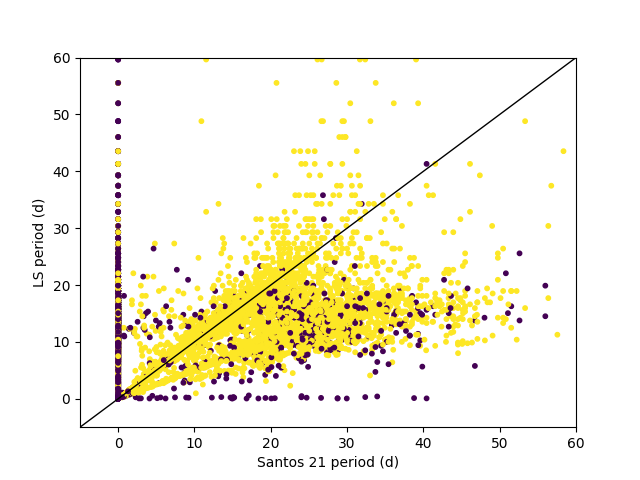

[(-5.0, 60.0),
 (-5.0, 60.0),
 Text(0.5, 0, 'Santos 21 period (d)'),
 Text(0, 0.5, 'LS period (d)')]

In [118]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.scatter(p_r_t_test, ls_tess_a_test, c=predictions, s=10)
ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
ax.set(xlim=(-5, 60), ylim=(-5,60),
       xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [22]:
peri_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst1['KIC'].values]
null_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst2['KIC'].values]

In [23]:
peri_pred.count(1)/len(peri_pred)

0.4895889914901322

In [24]:
null_pred.count(1)/len(null_pred)

0.5009617065920615

In [49]:
residuals = ls_tess_a_test[p_r_t_test>0] / p_r_t_test[p_r_t_test>0]
residuals_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)] / p_r_t_test[(p_r_t_test>0)&(predictions==1)]
residuals_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)] / p_r_t_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


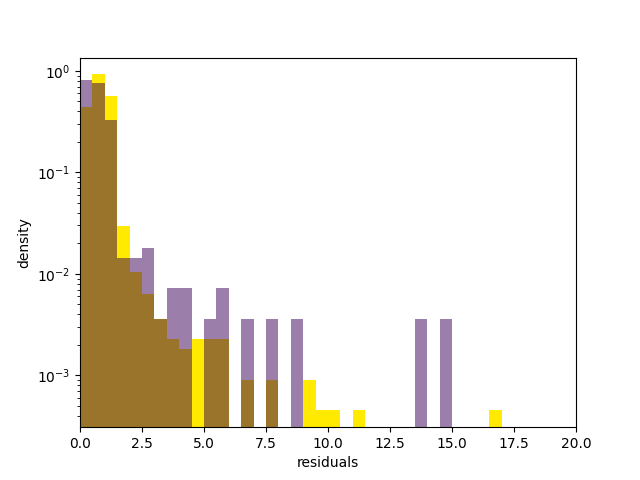

[(0.0, 20.0), Text(0.5, 0, 'residuals'), Text(0, 0.5, 'density')]

In [92]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(residuals_yeah, bins=np.arange(0,int(np.ceil(max(residuals_yeah))),0.5), log=True, density=True, color='#ffea00')
ax.hist(residuals_nope, bins=np.arange(0,int(np.ceil(max(residuals_nope))),0.5), log=True, density=True, color='#380057', alpha=0.5)
ax.set(xlim=(0,20), #ylim=(-5,60),
       xlabel='residuals', ylabel='density')

In [50]:
pred_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)]
pred_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


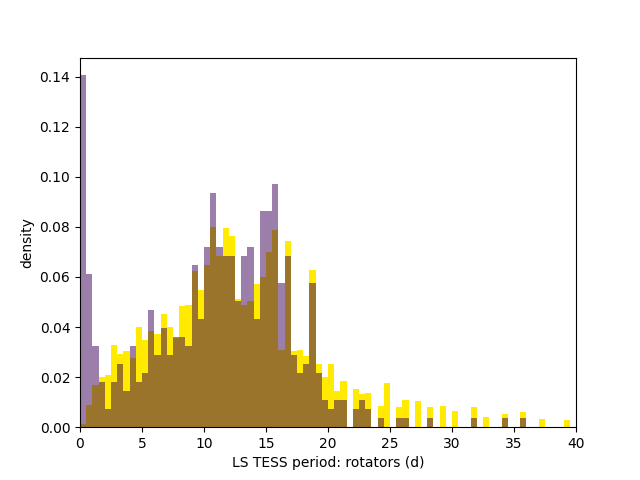

[(0.0, 40.0),
 Text(0.5, 0, 'LS TESS period: rotators (d)'),
 Text(0, 0.5, 'density')]

In [89]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(pred_yeah, bins=np.arange(0,int(np.ceil(max(pred_yeah))),0.5), log=False, density=True, color='#ffea00')
ax.hist(pred_nope, bins=np.arange(0,int(np.ceil(max(pred_nope))),0.5), log=False, density=True, color='#380057', alpha=0.5)
ax.set(xlim=(0,40), #ylim=(-5,60),
       xlabel='LS TESS period: rotators (d)', ylabel='density')

In [53]:
null_yeah = ls_tess_a_test[(p_r_t_test==0)&(predictions==1)]
null_nope = ls_tess_a_test[(p_r_t_test==0)&(predictions==0)]

<IPython.core.display.Javascript object>


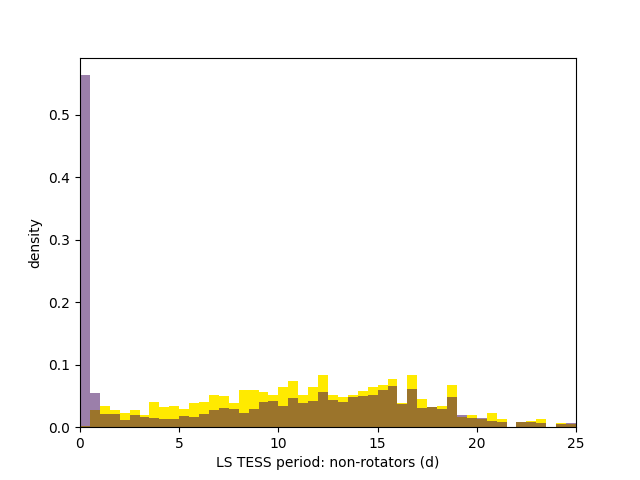

[(0.0, 25.0),
 Text(0.5, 0, 'LS TESS period: non-rotators (d)'),
 Text(0, 0.5, 'density')]

In [88]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(null_yeah, bins=np.arange(0,int(np.ceil(max(null_yeah))),0.5), log=False, density=True, color='#ffea00')
ax.hist(null_nope, bins=np.arange(0,int(np.ceil(max(null_nope))),0.5), log=False, density=True, color='#380057', alpha=0.5)
ax.set(xlim=(0,25), #ylim=(-5,60),
       xlabel='LS TESS period: non-rotators (d)', ylabel='density')